<a href="https://colab.research.google.com/github/TuanLBT/AI_learning/blob/main/fashion_Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import thư viện

In [1]:
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense
(x_trains,y_trains), (x_tests,y_tests) = fashion_mnist.load_data()

from keras.utils import to_categorical #lệnh chuyển qua hot endcoding

from keras.utils import load_img
from tensorflow.keras.utils import img_to_array
import matplotlib.pyplot as plt
import numpy as np

from keras.models import load_model

4422102/4422102 [==============================] - 0s 0us/step


Kiểm tra kích thước 

In [2]:
x_trains.shape

(60000, 28, 28)

In [3]:
y_trains.shape

(60000,)

In [4]:
x_tests.shape

(10000, 28, 28)

In [5]:
y_tests.shape

(10000,)

Tạo mạng mô hình

In [31]:
model = Sequential() #anh gom 28x28 (784 dau vao)
model.add(Dense(512,input_shape=(784,),activation='relu')) #lop dau tien la relu, thu 2 la softmax
model.add(Dense(10,activation='softmax')) #hàm để phân biệt 0 với 1 (gg thêm) chuyển về ảnh xám
#vì mô hình fashion_mnist có 10 class, nên đầu ra có 10 mức phân loại
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 512)               401920    
                                                                 
 dense_5 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


Xử lí dữ liệu

In [32]:
#scale lại dữ liệu của x_train
x_trains = x_trains.reshape([60000,28*28]) #fashion_mnist gom cac hình ảnh chứa grayscale
#nó là số nguyên(int) nên phải chuyển sang dạng float
x_train = x_trains.astype('float32')/255 

In [33]:
#scale lại dữ liệu của x_test
x_tests = x_tests.reshape([10000,28*28])
#nó là số nguyên(int) nên phải chuyển sang dạng float
x_test = x_tests.astype('float32')/255 

In [34]:
#chuyeenr sang encoding het
y_train = to_categorical(y_trains,10) 
y_test = to_categorical(y_tests,10)

In [35]:
y_train.shape

(60000, 10)

In [36]:
x_train.shape

(60000, 784)

Biên dịch

In [37]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics = ['accuracy']) #bộ tối ưu cho đầu ra là phân loại(RMSprop). mất mát sư dụng categlanal_cross.. (cũng là phân loại)
model.fit(x_train,y_train,epochs=10,batch_size=128) #kích thước học 1 lần ngẫu nhiên 128 thôi, ko học hết, học 1o lần, 
test_loss,test_acc=model.evaluate(x_test,y_test)
print('tét_accuracy',test_acc)
print('tét_loss',test_loss)

Epoch 1/10
469/469 [==============================] - 4s 8ms/step - loss: 0.5614 - accuracy: 0.8019
Epoch 2/10
469/469 [==============================] - 3s 7ms/step - loss: 0.3864 - accuracy: 0.8582
Epoch 3/10
469/469 [==============================] - 3s 7ms/step - loss: 0.3416 - accuracy: 0.8746
Epoch 4/10
469/469 [==============================] - 6s 12ms/step - loss: 0.3147 - accuracy: 0.8837
Epoch 5/10
469/469 [==============================] - 3s 7ms/step - loss: 0.2940 - accuracy: 0.8907
Epoch 6/10
469/469 [==============================] - 3s 7ms/step - loss: 0.2803 - accuracy: 0.8967
Epoch 7/10
469/469 [==============================] - 4s 9ms/step - loss: 0.2652 - accuracy: 0.9018
Epoch 8/10
469/469 [==============================] - 3s 7ms/step - loss: 0.2552 - accuracy: 0.9057
Epoch 9/10
469/469 [==============================] - 3s 7ms/step - loss: 0.2445 - accuracy: 0.9091
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.3281 - accuracy: 0.882

In [54]:
from PIL import Image

img = Image.open('sneaker_gray.jpg')
print(img.size)

(28, 20)


Test mô hình

1/1 [==============================] - 0s 20ms/step


array([6])

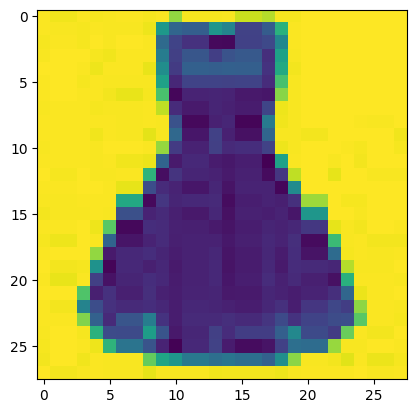

In [62]:
#test mo hinh
#lưu ý là mô hình này dựa trên dữ liệu học là grayscale, nên đưa ảnh màu vào sẽ lỗi

from keras.utils import load_img
from tensorflow.keras.utils import img_to_array
import matplotlib.pyplot as plt
import numpy as np
img = load_img('dress.jpg', color_mode='grayscale', target_size=(28, 28))
plt.imshow(img)
img = img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img.reshape(1,-1)
img = img.astype('float32')
img = img/255
np.argmax(model.predict(img),axis=-1)